# The Stereology module

TODO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# run the script (change the path to GrainSizeTools_script.py accordingly!)
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: 2024.02.xx
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



volume fraction (up to 50 microns) = 41.65 %
bin size = 14.24


(<Figure size 1000x400 with 2 Axes>,
 (<Axes: xlabel='diameter ($\\mu m$)', ylabel='density'>,
  <Axes: xlabel='diameter ($\\mu m$)', ylabel='cumulative volume (%)'>))

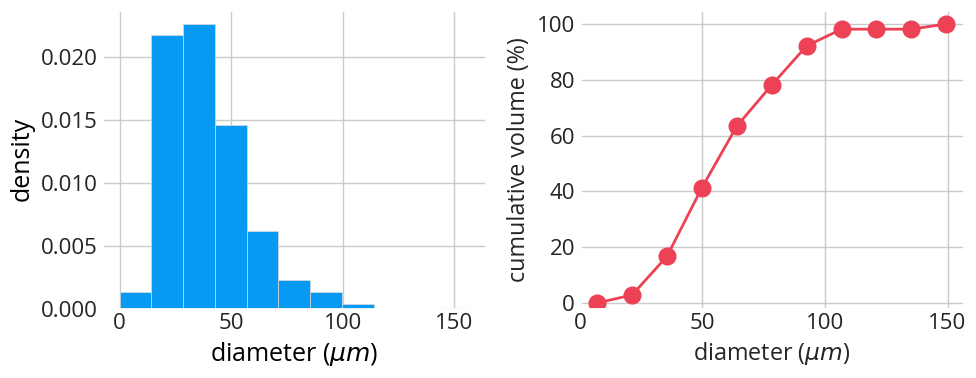

In [3]:
# Import the example dataset
filepath = 'C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/DATA/data_set.txt'
dataset = pd.read_csv(filepath, sep='\t')

# estimate equivalent circular diameters
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)

# apply the Saltykov method from stereology module
stereology.Saltykov(dataset['diameters'], numbins=11, calc_vol=50)

In [4]:
stereology.Saltykov?

Signature:
stereology.Saltykov(
    diameters,
    numbins=10,
    calc_vol=None,
    text_file=None,
    return_data=False,
    left_edge=0,
)
Docstring:
Estimate the actual (3D) distribution of grain size from the population
of apparent diameters measured in a thin section using a Saltykov-type
algorithm (Saltykov 1967; Sahagian and Proussevitch 1998).

The Saltykov method is optimal to estimate the volume of a particular grain
size fraction as well as to obtain a qualitative view of the appearance of
the actual 3D grain size population, either in uni- or multimodal populations.

Parameters
----------
diameters : array_like
    the apparent diameters of the grains.

numbins : positive integer, optional
    the number of bins/classes of the histogram. If not declared,
    is set to 10 by default.

calc_vol : positive scalar or None, optional
    if the user specifies a diameter, the function will return the volume
    occupied by the grain fraction up to that diameter.

text_file : st

In [5]:
mid_points, densities = stereology.Saltykov(dataset['diameters'], numbins=11, return_data=True)
print(densities)

[1.31536871e-03 2.17302235e-02 2.25631643e-02 1.45570771e-02
 6.13586532e-03 2.24830266e-03 1.29306084e-03 3.60326809e-04
 0.00000000e+00 0.00000000e+00 4.11071036e-05]


In [6]:
np.sum(densities)

0.07024449636922886

In [7]:
corrected_densities = densities * 14.236
np.sum(corrected_densities)

1.000000650312342

In [8]:
for index, percent in enumerate(corrected_densities):
    print(f'Class (midpoint): {mid_points[index]:.2f}, volume: {percent*100:.1f} %')

Class (midpoint): 7.12, volume: 1.9 %
Class (midpoint): 21.35, volume: 30.9 %
Class (midpoint): 35.59, volume: 32.1 %
Class (midpoint): 49.83, volume: 20.7 %
Class (midpoint): 64.06, volume: 8.7 %
Class (midpoint): 78.30, volume: 3.2 %
Class (midpoint): 92.53, volume: 1.8 %
Class (midpoint): 106.77, volume: 0.5 %
Class (midpoint): 121.01, volume: 0.0 %
Class (midpoint): 135.24, volume: 0.0 %
Class (midpoint): 149.48, volume: 0.1 %


PREDICTED OPTIMAL VALUES
Number of classes: 11
MSD (lognormal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='diameter ($\\mu m$)', ylabel='freq. (per unit vol.)'>)

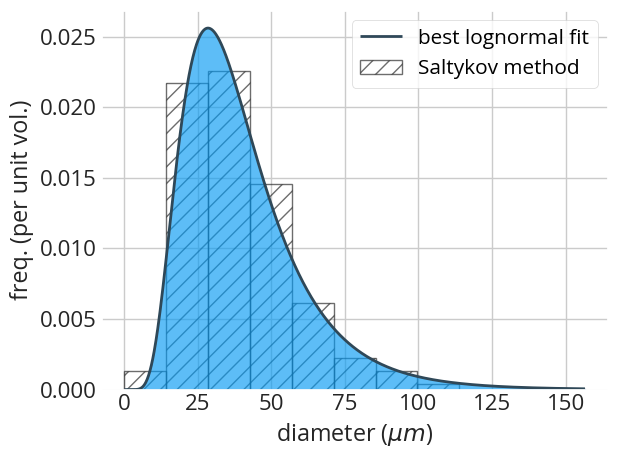

In [9]:
stereology.calc_shape(dataset['diameters'])

In [10]:
geo_mean = 36.05
msd = 1.63
mu = np.log(geo_mean)
sigma = np.log(msd)

amean = np.exp(mu + (sigma**2 / 2))
mode = np.exp(mu - sigma**2)
print(f'mean = {amean:.2f}')
print(f'mode = {mode:.2f}')

mean = 40.62
mode = 28.39


In [11]:
from scipy.stats import lognorm

# Create a lognormal distribution
dist = lognorm(s=sigma, scale=geo_mean)

# Calculate the volume fraction between sizes 75 and 25
volume_fraction = dist.cdf(75) - dist.cdf(25)

print(f'volume fraction = {volume_fraction * 100:.1f} %')

volume fraction = 70.6 %


In [12]:
help(stereology.calc_shape)

Help on function calc_shape in module stereology:

calc_shape(diameters, class_range=(10, 20))
    Approximates the shape of the actual (3D) distribution of grain size
    from a population of apparent diameters measured in a thin section using
    the two-step method (Lopez-Sanchez and Llana-Funez, 2016).
    
    The method only works properly for unimodal lognormal-like grain size
    populations and returns the MSD (i.e. shape) and the geometric mean
    (i.e. scale) values, which describe the lognormal population of grain sizes
    at their original (linear) scale.
    
    Parameters
    ----------
    diameters : array_like
        the apparent diameters of the grains
    
    class_range : tupe or list with two values, optional
        the range of classes considered. The algorithm will estimate the optimal
        number of classes within the defined range. Default = (10, 20)
    
    
    Call functions
    --------------
    - Saltykov,
    - fit_log,
    - log_function
    

In [13]:
import sys
from datetime import date    
today = date.today().isoformat()
import matplotlib as mpl

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2024-02-07 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.3
Matplotlib 3.8.0
